# Machine Learning Engineer Nanodegree
## Capstone Project - Who Wrote This? 
... or how to identify the author of anonymous articles using natural languange processing.

Stefan Dittforth  
February 27th, 2018

--------------

## Sources:

[1] ["Who’s At The Keyboard? Authorship Attribution in Digital Evidence Investigations"](www.utica.edu/academic/institutes/ecii/publications/articles/B49F9C4A-0362-765C-6A235CB8ABDFACFF.pdf): good reference regarding number of authors and text volume.

[2] ["How a Computer Program Helped Show J.K. Rowling write A Cuckoo’s Calling"](https://www.scientificamerican.com/article/how-a-computer-program-helped-show-jk-rowling-write-a-cuckoos-calling/): some good ideas for feature to analyse.

[3] [How to solve 90% of NLP problems: a step-by-step guide](https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e)

[4] [scikit learn documentation: confusion matrix](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

## Research Notes:

- add some article screen shots to the text
- test approaches suggested in [1]
- measure average word lentgh per article, distribution of word lengths, the 100 most common words, distribution of character 4-grams, word bigrams
- test with support vector machines
- using word embeddings as a much rich representation
Some good tips from [3]:
- Clean data:
    - Remove all irrelevant characters such as any non alphanumeric characters
    - Tokenize your text by separating it into individual words
    - Remove words that are not relevant, such as “@” twitter mentions or urls
    - Convert all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO” the same
    - Consider combining misspelled or alternately spelled words to a single representation (e.g. “cool”/”kewl”/”cooool”)
    - Consider lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)
- do random guess model
- One-hot encoding (Bag of Words)
- do we do bag-of-words on sentence level or article level? hmm ...
- apply PCA to visualise bag of words
- start with testing logistic regression for classification
- visualise confusion matrix
- vocabulary structure TF-IDF
- Word2Vec?
- LSTM
- Convolutional Neural Networks for Sentence Classification





----------------
## Introduction

write some introduction

----------------
## Data Acquisition

In order to allow the system to learn the writing characteristics of different authors we require a dataset that provides a large number of articles for individual authors. There are rich datasets for NLP research available in the public domain. A list, as an example, can be found [here](https://github.com/niderhoff/nlp-datasets). However, as part of this project we will build our own dataset. We will develop a web scraper that will collect articles from the publishing platform Medium. The articles on Medium seem to be reasonably long (at least several hundred words). There are enough authors that have published several hundreds articles. With this, it appears feasible to acquire a large enough data set to learn patterns in the writing characteristics to distinguish between individual authors.

This approach has been chosen as an opportunity to develop practical experience not only in machine learning but also around data acquisition. In data science and machine learning the acquisition and preparation of high quality data is often the bigger challenge than the actual development of the machine learning system itself. In "[Datasets Over Algorithms](https://www.edge.org/response-detail/26587)" author Alexander Wissner-Gross notes that 

>*"the average elapsed time between key [machine learning] algorithm proposals and corresponding advances was about eighteen years, whereas the average elapsed time between key dataset availabilities and corresponding advances was less than three years, or about six times faster, suggesting that datasets might have been limiting factors in the advances."*.

Conveniently the website [Top Authors](https://topauthors.xyz/) has published a list of 300+ top Medium authors. The project folder contains the short script `get_list_of_Medium_authors.py` that has been used to extract the Medium URL for each author. The initial list of 300+ authors has been reduced to 25. The criteria for this reduction was the number of published articles. For the 25 authors there are at least 300 articles available. The Medium URLs for these authors can be found in file `Medium_authors_25.txt`.

<img src="notebook/Top Authors.jpg" alt="Drawing" style="width: 400px;"/>
<center>*getting a list of Medium 
authors*</center>

The actual collection of the articles is done with the script `pull_Medium_articles.py`. The script performs two steps. First, it builds a list of all article URLs and for each article saves author URL and article URL in JSON format in the file `Medium_article_urls.json`. Below is an example how the entries for three articles look like.

```javascript
{"author_URL": "https://medium.com/@tedr/latest\n",
 "article_URL": "https://medium.com/season-of-the-witch/etiquette-and-the-cancer-patient-630a50047448?source=user_profile---------1----------------"}
{"author_URL": "https://medium.com/@esterbloom/latest\n",
 "article_URL": "https://medium.com/the-billfold/failing-at-shoplifting-life-with-kesha-bc2600b1f440?source=user_profile---------789----------------"}
{"author_URL": "https://medium.com/@gassee/latest",
 "article_URL": "https://mondaynote.com/the-ny-times-un-free-at-last-df2eddba360b?source=user_profile---------281----------------"}
```

The second part performs the actual download of the articles. The script reads the article URL saved in `Medium_article_urls.json`, navigates to the website and reads the text information from the html code of the article website. Each article is saved in text format in its own file. For each author a folder is generated that contains the articles for that author. Initially it was intended to store all articles in JSON format in one file. This turned out to be very cumbersome when troubleshooting the `pull_Medium_articles.py` script. Having a folder structure that allows to do quick visual inspections over the list of files in a file manager proved very helpful. In addition, the smaller article files made it easier to spot check the downloaded text information in a text editor.

During research for this project several Python libraries for interacting with websites have been explored: [mechanize](https://pypi.python.org/pypi/mechanize/0.3.6), [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#), [scrapy](https://scrapy.org/) and the [Selenium WebDriver](https://www.seleniumhq.org/projects/webdriver/). Eventually the decision was made to use the Selenium WebDriver. The key reason for this was: the Medium website uses a two step login process. The users provides its email address and then receives a one time login link via this email. That made it difficult to automate the login via script and ruled out all the libraries that don't allow user interaction with the website.

Once an article website is loaded, the required information can be pulled from the text attribute of specific html elements. The code snipped below shows the commands used to get the author name and the article text.

```python
author = self.browser.find_element_by_xpath('//a[@rel="author cc:attributionUrl"]').text
body = self.browser.find_element_by_xpath('//div[@class="postArticle-content js-postField js-notesSource js-trackedPost"]').text
```

As shown in the code snippet above the right elements are addressed by their respective xpath. Finding these xpaths required a bit of trail and error. A valuable tool for this is the FireFox Inspector. It allows to inspect the code and structure of a website and to find the right path to the right html element.

![Top Authors](notebook\Firefox Inspector.jpg)
<center>*finding the right xpath with Firefox Inspector*</center>

After the `pull_Medium_articles.py` script completed, the folder `Medium_articles` containing all article files has been compressed into a ZIP archive to preserve storage. With [`zipfile`](https://docs.python.org/3/library/zipfile.html) Python provides a library to work with ZIP archives. Going forward in this Notebook we will make use of this library to work with the files directly within the ZIP archive without the need to extract the archive.

Developing a web scraper script poses its own challenges. The initial idea is pretty straightforward: here is a list of URLs, go to each website, download the text part and save it in a file. As always, the pitfalls are discovered during implementation. Some time had to be invested to understand the structure of the Medium article websites and figure out the best way to find the right html elements that contain the required information. The Selenium WebDriver is not the most effective tool when it comes to scraping several thousand websites. The time to render each and every website adds up. An attempt has been made by parallelising the article download with multi-threading and spawning of several instances of the Firefox browser. This failed. It turned out that the fast sequence of websites caused Firefox to slowly consume all available memory and eventually Firefox stopped fetching new websites. In a parallelised version of the script the problem was only exaggerated. Finally, a pragamatic approach was taken and the script has been amended with the capability to continue the work where it has left off from a previous run. Over the course of several days the script has been restarted several times and eventually saved all articles.

In defense for Selenium, it needs to be noted that Selenium first and foremost is a tool to automate testing of websites and not a tool for scaping several thousand websites. The primary goal behind the `pull_Medium_articles.py` script was to get the data for this capstone project and not to develop a sophisticated web scraper. In this respect Selenium did the job. Despite the challenges, developing the web scraper script has been a worthwhile learing experience. It provided an opportunity to develop practical experience not only in machine learning but also around data acquisition.

In the next section we will explore the data set. We will also check what data preparation or cleaning activities might be required before we can apply algorithms  to the data set.

----------------
## Exploring the Data Set

All articles have been downloaded in individual text files and into folders for each author. This folder and file structure has been archived into `Medium_articles.zip`. Let's go through the files and get an overview about the data set. 

In [63]:
# We use this code block to load all the libraries we will need
# throughout the Notebook. Keeping all library calls in one place at
# beginning allows to run other code cells more independently.

import zipfile
import json
import pandas as pd
import re
import random
import string
import pprint
import itertools
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cycler import cycler
from sklearn import tree
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# some global settings for the Notebook
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = [13, 13]

In [10]:
def get_next_article_from_zip_file(file_name):
    """
    A generator function that reads the files in a zip archive one by one.
    """
    zf = zipfile.ZipFile(file_name, 'r')
    names = zf.namelist()
    for name in names:
        if name.endswith('.json'):
            data = zf.read(name)
            yield data
    zf.close()
    return

# read all articles into a pandas data frame
articles = pd.DataFrame(columns=['url', 'author', 'headline', 'body'])
for article_file in get_next_article_from_zip_file('Medium_articles.zip'):
    article = json.loads(article_file)
    articles = articles.append(json.loads(article_file), ignore_index=True)

In [11]:
# show a list of authors and the number of articles for each author
summary = articles[['author', 'body']].groupby('author').count()
summary.columns = ['number of articles']
display(summary.sort_values('number of articles', ascending=False))
print('Total number of articles: {:,}'.format(len(articles)))

,number of articles
author,
Nicole Dieker,1948
Fabricio Teixeira,1733
Ester Bloom,1328
Ethan Siegel,1323
Yann Girard,1042
Pascal Finette,1020
Jon Westenberg 🌈,932
Chris Messina,872
Mark Suster,825


Total number of articles: 18,564


## Cleaning the Dataset

The articles were downloaded by extracting the 'text' attribute from html elements that contain the body text of the article. Many articles contain images, URLs to other pages, etc. We are interested to see if the text extracts still contain html fragments we might need to clean out. We do a qick check by listing the articles that contain the '<' and '>' characters. Those two characters enclose HTML tags. 

In [12]:
regex = r'<.*>' # find any HTML tag enclosing brackets
counter = 0
for index, article in articles.iterrows():
    matches = re.finditer(regex, article['body'], re.DOTALL)
    for matchNum, match in enumerate(matches):
        counter = counter + 1
        print('Match number: {}'.format(counter))
        print('Match in article index: {}'.format(index))
        print(article['url'])
        print(match.group())

Match number: 1
Match in article index: 239
https://medium.com/@bfeld/people-are-the-price-of-admission-7782d2c55bba?source=user_profile---------85----------------
<riff>
We have a set of filters. For an early stage investment, we only invest in our themes. We only invest in the US. We don’t have to be the first money in a company, but if the company has raised more than $5m, it’s too late for us. Our goal with this filter is to say no to almost everything within 60 seconds.
Assuming something passes through this filter, we then focus on three things.
Do we have an affinity for the product? We don’t have to be daily users of the product, but we have to care about it in some way.
Are the founders obsessed (not passionate, but obsessed) about what they are building? Passion is easy to fake. Obsession is not.
Do the founders want us to be investors in their company as much as we want to be investors in their company? If it’s not bi-directional, that’s fine, but it’s not for us.
</riff>
Ma

Match number: 35
Match in article index: 10918
https://bothsidesofthetable.com/venture-capital-q-a-session-3c8f7ea759ed?source=user_profile---------625----------------
<< we then discussed the need to do trademarks on your company and your key brand names. We told the horror story of the company that originally owned the URL groupon.com and lost it due to not having a trademark. we thanked our sponsor, LegalZoom, for providing trademark services cheaply >>
Match number: 36
Match in article index: 10931
https://bothsidesofthetable.com/want-to-know-why-charging-12-year-converts-higher-than-9-99-a279fefaa0ae?source=user_profile---------543----------------
<Small plug> — I invested in an awesome company called … awe.sm … that is a performance tracking tool that let’s you measure efficacy of channels like this (email, facebook, twitter, linkedin, etc.) as well as what drove the success of the campaigns. They’ve worked with a few small companies like Zynga, Playdom, GroupOn and TopSpin Media

There are only 156 occurences for the '<' and '>' characters in over 18,500 articles. Doing some spot checks it appears that the tag brackets are genuine parts of the article text (for example the text is about HTML coding). We will leave them in for now. No need to clean them out.

Let's have a look at some article texts.

In [13]:
print('A few example articles:')
for _ in range(1,4):
    i = random.randrange(len(articles))
    print('----------------------')
    print('Index: {}'.format(i))
    print('URL: {}'.format(articles.iloc[i]['url']))
    print('Author: {}'.format(articles.iloc[i]['author']))
    print('Headline: {}'.format(articles.iloc[i]['headline']))
    print('Body: {}'.format(articles.iloc[i]['body']))

A few example articles:
----------------------
Index: 7825
URL: https://write.100nakedwords.com/144-to-be-cold-is-to-be-alive-cfd11066b716?source=user_profile---------468----------------
Author: Johnson Kee
Headline: 144. To be cold is to be alive
Body: 144. To be cold is to be alive
This is coming from someone who loves the heat.
I love summer. I love sweating it out, wearing less and warmth on my skin. But as the years passed, I came to love the winter. “Real life” left to its own devices becomes monotony. Days become blurs. Months become smears.
Self awareness is what saves you and punctuates each blur with a hard period of pain. Coldness hurts. I usually get up first in the morning. I’m shivering as I haul my tired body out of bed.
But it’s a good sort of pain. It makes me aware of myself. Aware of my skin crawling, goosebumps working together to protect the heat dissipating into the air.
The coldness reminds me I have to work — work to escape the cold. Work to create a life that g

The code above randomly selects 3 articles. We run it a few times. At each run we spot check the text in the 'Body' section. It appears that the text is clean and good to go for our next step.

Typically NLP text cleaning tasks include removing punctuation characters. For now we will keep them. In one of our first classification approaches we will use them to engineer features around number and length of sentences and paragraphs in articles.

---
## Balancing the Data Set

As seen above in the table with the number of articles per authors the data set is skewed. The number of articles ranges from 1,948 for Nicole Dieker and 307 for Gary Vaynerchuk. To avoid that our system develops a bias towards authors with a high number of articles we will balance the data set. This will be done by keeping the number of articles for each author equal to the author with the lowest number of articles.

In [14]:
# get the smallest number for articles for one author 
num_articles_to_keep = summary.min(axis=0)['number of articles']

# only keep the smallest number of articles for each author
indices_to_keep = []
for author, num_of_articles in summary.iterrows():
    indices_to_keep = indices_to_keep + \
                      list(articles[articles.author == author]\
                      [:num_articles_to_keep].index.values)
articles = articles.iloc[indices_to_keep]

# check number of articles for each author
summary = articles[['author', 'body']].groupby('author').count()
summary.columns = ['number of articles']
display(summary.sort_values('number of articles', ascending=False))
print('Total number of articles: {:,}'.format(len(articles)))

,number of articles
author,
Brad Feld,307
Nicole Dieker,307
howardlindzon,307
Yann Girard,307
Todd Brison,307
Tim Boucher,307
Thaddeus Howze,307
Ted Rheingold,307
Srinivas Rao,307


Total number of articles: 7,675


## Model 1: The Baseline Model - Just Guess the Author

In the course of this notebook we will try several approaches to predict the author of a given text. To assess the quality of the prediction we will need to compare against some baseline. In our case we will simply do a random guess of who the author of an article is. This should get us in the order of $\frac{1}{n}\cdot100$ percent accuracy, where $n$ represents the number of authors in the dataset.

In [15]:
labels = articles[['author']]
authors = labels.author.unique()
y_predict = pd.DataFrame()
y_predict['author'] = np.random.choice((authors), len(labels))
score_test = accuracy_score(labels, y_predict)

# report random guess results
print('Just guess the author:')
print('----------------------\n')
print('number of authors in data set: {}'.format(len(authors)))
print('expected prediction accuracy around: {:.2f}%'.format(1/len(authors)*100))
print('prediction accuracy score on data set: {:.2f}%'.format(score_test*100))

Just guess the author:
----------------------

number of authors in data set: 25
expected prediction accuracy around: 4.00%
prediction accuracy score on data set: 4.26%


## Model 2: Basic Article Metrics

Let's first come up with some simple metrics as features that might help us to predict the author of an article.  Some metrics that come to mind are: the total, mean, median, min and max number of words in paragraphs, sentences and the article itself. When looking at different authors it appears that these features might be useful differentiators. Some authors have a tendency to longer articles. Others use longer sentences or shorter paragraphs.

The code below "tokenizes" the articles into paragraphs, sentences and words. In addition in counts the number of each. The tokenized article is returned as a nested dict object. check the next code cell to see how this looks for a sample article.

In [16]:
pp = pprint.PrettyPrinter(indent=2)

def tokenize_paragraphs(text):
    paragraphs = [p for p in text.split('\n')]
    paragraphs_tokenized = []
    for paragraph in paragraphs:
        sentences = tokenize_sentences(paragraph)
        paragraphs_tokenized.append(sentences)
    num_paragraphs = len(paragraphs_tokenized)
    text_tokenized = {'num_paragraphs': num_paragraphs,
                      'paragraphs': paragraphs_tokenized}
    return text_tokenized

def tokenize_sentences(paragraph):
    sentences = sent_tokenize(paragraph)
    sentences_tokenized = []
    for sentence in sentences:
        words = tokenize_words(sentence)
        sentences_tokenized.append(words)
    num_sentences = len(sentences_tokenized)
    paragraph_tokenized = {'num_sentences': num_sentences,
                           'sentences': sentences_tokenized}
    return paragraph_tokenized

def tokenize_words(sentence):
    words_tokenized = word_tokenize(sentence)
    # remove punctuations from word list
    words_tokenized = remove_punctuation(words_tokenized)
    num_words = len(words_tokenized)
    sentence_tokenized = {'num_words': num_words,
                          'words': words_tokenized}
    return sentence_tokenized

def remove_punctuation(words_tokenized):
    return [w for w in words_tokenized 
            if not re.fullmatch('[' + string.punctuation + '’“‘”–…' ']', w)]

def get_article_metrics(body):
    body_tokenized = tokenize_paragraphs(body)
    paragraphs_sentences = []
    sentences_words = []
    for paragraph in body_tokenized['paragraphs']:
        paragraphs_sentences.append(paragraph['num_sentences'])
        for sentence in paragraph['sentences']:
            sentences_words.append(sentence['num_words'])
    paragraphs_sentences = pd.Series(paragraphs_sentences)
    sentences_words = pd.Series(sentences_words)
    metrics = {'article_num_paragraphs': body_tokenized['num_paragraphs'],
               'article_num_sentences': paragraphs_sentences.sum(),
               'article_num_words': sentences_words.sum(),
               'paragraphs_min_sentences': paragraphs_sentences.min(),
               'paragraphs_max_sentences': paragraphs_sentences.max(),
               'paragraphs_mean_sentences': paragraphs_sentences.mean(),
               'paragraphs_median_sentences': paragraphs_sentences.median(),
               'sentences_min_words': sentences_words.min(),
               'sentences_max_words': sentences_words.max(),
               'sentences_mean_words': sentences_words.mean(),
               'sentences_median_words': sentences_words.median()}
    return metrics

# calculate the basic metrics for each article
articles_metrics = pd.DataFrame(list(articles['body'].map(get_article_metrics)),
                                index=articles.index)
articles_metrics.insert(loc=0, column='author', value=articles['author'])
display(articles_metrics)

,author,article_num_paragraphs,article_num_sentences,article_num_words,paragraphs_max_sentences,paragraphs_mean_sentences,paragraphs_median_sentences,paragraphs_min_sentences,sentences_max_words,sentences_mean_words,sentences_median_words,sentences_min_words
0,Brad Feld,3,5,67,3,1.666667,1.0,1,31,13.400000,9.0,2
1,Brad Feld,3,4,68,2,1.333333,1.0,1,43,17.000000,10.0,5
2,Brad Feld,13,45,708,7,3.461538,3.0,1,30,15.733333,17.0,3
3,Brad Feld,5,10,90,5,2.000000,1.0,1,19,9.000000,8.0,1
4,Brad Feld,16,40,582,5,2.500000,2.0,1,48,14.550000,12.0,2
5,Brad Feld,7,23,424,7,3.285714,3.0,1,42,18.434783,18.0,3
6,Brad Feld,19,52,860,5,2.736842,3.0,1,41,16.538462,14.5,5
7,Brad Feld,6,12,223,4,2.000000,1.5,1,49,18.583333,15.5,5
8,Brad Feld,14,42,755,6,3.000000,3.0,1,50,17.976190,16.5,3
9,Brad Feld,14,32,494,7,2.285714,2.0,1,38,15.437500,13.0,4


And here is how a tokenized article looks like ...

In [ ]:
# display an example for a tokenized article
sample_article_index = 17125 # just a random pick
body_tokenized = tokenize_paragraphs(articles.loc[sample_article_index]['body'])
print('\nSample article tokenized:\n')
pp.pprint(body_tokenized)

Now that we have the basic metrics as features in a pandas data frame we will plot a few scatter diagrams to get a feeling for how strong they separate different authors.

In [ ]:
def plot_feature_scatters(articles_list, authors, plot_features, plot_labels):
    num_features = plot_features.__len__()
    
    # set up the figure 
    fig, axes = plt.subplots(nrows=num_features, ncols=num_features)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    fig.suptitle("Feature Relationships", fontsize=18)
    
    # set up the axes
    for ax in axes.flat:
        ax.tick_params(axis='both',
                       bottom='off', top='off', left='off', right='off',
                       labelbottom='off', labeltop='off',
                       labelleft='off', labelright='off')
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
            ax.tick_params(axis='y', left='on', labelleft='on')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
            ax.tick_params(axis='y', right='on', labelright='on')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
            ax.tick_params(axis='x', top='on', labeltop='on')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')
            ax.tick_params(axis='x', bottom='on', labelbottom='on')
        # set colour cycler, each author a different colour 
        ax.set_prop_cycle(cycler('color', ['blue', 'green', 'red', 'cyan',
                                           'magenta', 'yellow', 'black', 'white']))
        
    # plot the scatter plots
    for c in range(num_features):
        for r in range(num_features):
            if c == r:
                # leave diagonal plots empty and remove ticks and labels
                axes[r, c].xaxis.set_visible(False)
                axes[r, c].yaxis.set_visible(False)
            elif r > c:
                axes[r, c].axis('off')
            else:
                axes[r, c].set_prop_cycle(None) # reset colour cycler
                for author in authors:
                    x = articles_list[articles_list.author == author][plot_features[c]]
                    y = articles_list[articles_list.author == author][plot_features[r]]
                    axes[r, c].scatter(x, y, s=2, alpha=0.5, label=author)

    # place a legend below the top left plot
    axes[0, 1].legend(bbox_to_anchor=(-1.1, 1), loc=3, prop={'size': 12}, markerscale=6)

    # add axis labels in diagonal boxes
    for i, label in enumerate(plot_labels):
        axes[i,i].annotate(label, (0.5, 0.5), 
                           xycoords='axes fraction', ha='center', va='center',
                           size=12)
    
    return fig

In [ ]:
figure1 = plot_feature_scatters(articles_metrics,
                ['Brad Feld', 'Jean-Louis Gassée',
                 'James Altucher', 'Gary Vaynerchuk', 'Ethan Siegel'],
                ['article_num_paragraphs', 'article_num_sentences', 'article_num_words',
                 'paragraphs_max_sentences', 'paragraphs_median_sentences',
                 'sentences_max_words', 'sentences_median_words'],
                ['paragraphs /\narticle', 'sentences /\narticle', 'words /\narticle',
                 'max sentences /\nparagraph', 'median\nsentences /\nparagraph',
                 'max words /\nsentence', 'median words /\nsentence'])
plt.show()

From the scatter plots above it appears that a separation to some degree would be possible. For example, the plot for "words / article" vs "max words / sentence" shows distinct clusters for individual authors. Although the clusters seem to overlap quite a bit.

We will run a few classifier models and see what prediction accuracy we can achieve on a training data set. First, we will try the decision tree algorithm. Decision tree has the advantage that it can work with features that are not normalised.

In [17]:
# split labels into separate data frame
data = articles_metrics
labels = data[['author']]
data = data.drop('author', 1)

# shuffle training test split
X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.25,
                                                    random_state=23)

# decision tree prediction model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
score_train = accuracy_score(y_train, clf.predict(X_train))
score_test = accuracy_score(y_test, clf.predict(X_test))

# report decision tree results
print('decision tree classifier:')
print('-------------------------\n')
print('prediction accuracy score on training data set: {:.2f}%'.format(score_train*100))
print('prediction accuracy score on test data set: {:.2f}%'.format(score_test*100))

decision tree classifier:
-------------------------

prediction accuracy score on training data set: 99.98%
prediction accuracy score on test data set: 33.45%


Nearly 100% on the training data! That's awaesome!

Ok.... just joking ;-)

On unseen data the accuracy is 33.51%. I think that's not too bad for a model that tries to guess the author of an article only based on word count lenght of articles, paragraphs and sentences. The model does not take anything of the article content into account. The 100% accuracy on the training data means the model is extremly biased. It would be interesting to see if a grid search can find a better set of parameters.

In [ ]:
# setup grid search
cv_sets = ShuffleSplit(n_splits=10, test_size = 0.25, random_state = 23)
learning_model = tree.DecisionTreeClassifier()
params = {'max_depth': list(range(1,30)),
          'min_samples_split': list(range(2,50))}
scoring_fnc = make_scorer(accuracy_score, greater_is_better=True)
grid = GridSearchCV(estimator=learning_model,
                    param_grid=params,
                    scoring=scoring_fnc,
                    cv=cv_sets,
                    verbose=2)

# run grid search
grid = grid.fit(X_train, y_train)
best_clf = grid.best_estimator_
score_test = accuracy_score(y_test, best_clf.predict(X_test))

# TODO: add some code to save grid search result object to pickle file

print('GridSearch prediction accuracy score on test data set: {:.2f}%'.format(score_test*100))
print('best parameters:')
print('    max_depth:{0}'.format(best_clf.get_params()['max_depth']))
print('    min_samples_split:{0}'.format(best_clf.get_params()['min_samples_split']))

The optimisation of two parameters with grid search gains us three more percentage points to 36.32%. A little bit better.

We will do a run with the logistic regression algorithm and see if that yields better results. 

In [ ]:
# logistic regression prediction model
clf = linear_model.LogisticRegression()
clf = clf.fit(X_train, y_train.values.ravel())
score_train = accuracy_score(y_train, clf.predict(X_train))
score_test = accuracy_score(y_test, clf.predict(X_test))

# report logistic regression results
print('\nlogistic regression classifier:')
print('-------------------------------\n')
print('prediction accuracy score on training data set: {:.2f}%'.format(score_train*100))
print('prediction accuracy score on test data set: {:.2f}%'.format(score_test*100))

In [ ]:
# TODO: use PCA to find the most citical features of the basic article metrics model

## Model 2: Bag-of-Words

In our next model we will make use of the of the actual words in our prediction model. We will implement a the bag-of-words algorithm. Used source: reference to machne learning book from Jason Brownlee

to reduce vector length we remove punctuation, stop words and reduce to stems.

In [18]:
def pre_process_text(article):
    stop_words = set(stopwords.words('english'))
    porter = PorterStemmer()
    # tokenize article into words
    words = tokenize_words(article)['words']
    # remove stop words
    words = [word for word in words if not word in stop_words]
    # reduce words to its base and make all words lowercase
    words = set([porter.stem(word) for word in words])
    processed_text = ' '.join(words)
    return processed_text

# transform arcticles in to bag-of-words
data = [pre_process_text(article['body']) for index, article in articles.iterrows()]
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(data)
print('size of vocabulary: {} words'.format(len(vectorizer.vocabulary_)))

size of vocabulary: 58502 words


In [57]:
def train_classifier(data, labels, classifier_algorithm):
    X_train = data
    y_train = labels
    clf = classifier_algorithm
    clf = clf.fit(X_train, y_train.values.ravel())
    return clf

def test_classifiers(classifiers, X_train, X_test, y_train, y_test):
    for classifier in classifiers:
        classifier_algorithm = classifier['algorithm']
        display_text = classifier['display_text']

        # train and test prediction model
        clf = train_classifier(X_train, y_train, classifier_algorithm)
        score_train = accuracy_score(y_train, clf.predict(X_train))
        score_test = accuracy_score(y_test, clf.predict(X_test))

        # report results
        print('\n{}:'.format(display_text))
        print('-------------------------------\n')
        print('prediction accuracy score on training data set: {:.2f}%'.format(score_train*100))
        print('prediction accuracy score on test data set: {:.2f}%'.format(score_test*100))
    return

In [64]:
# prediction based only on word count

# split training and test data
X_train, X_test, y_train, y_test = train_test_split(data_vectorized, labels, test_size=0.25, random_state=23)

classifiers = [
    {'algorithm': linear_model.LogisticRegression(),
     'display_text': 'logistic regression classifier'},
    {'algorithm': tree.DecisionTreeClassifier(),
     'display_text': 'decision tree classifier'},
    {'algorithm': svm.SVC(),
     'display_text': 'SVM classifier'}
]
test_classifiers(classifiers, X_train, X_test, y_train, y_test)


logistic regression classifier:
-------------------------------

prediction accuracy score on training data set: 100.00%
prediction accuracy score on test data set: 96.35%

decision tree classifier:
-------------------------------

prediction accuracy score on training data set: 100.00%
prediction accuracy score on test data set: 77.07%

SVM classifier:
-------------------------------

prediction accuracy score on training data set: 6.29%
prediction accuracy score on test data set: 4.95%


In [20]:
# transform into vector representation
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(data_vectorized.toarray())
# split training and test data
X_train, X_test, y_train, y_test = train_test_split(tfidf, labels, test_size=0.25, random_state=23)

In [ ]:
# decision tree prediction model
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
score_train = accuracy_score(y_train, clf.predict(X_train))
score_test = accuracy_score(y_test, clf.predict(X_test))

# report decision tree results
print('decision tree classifier:')
print('-------------------------\n')
print('prediction accuracy score on training data set: {:.2f}%'.format(score_train*100))
print('prediction accuracy score on test data set: {:.2f}%'.format(score_test*100))

In [ ]:
# logistic regression prediction model
clf = linear_model.LogisticRegression()
clf = clf.fit(X_train, y_train.values.ravel())
score_train = accuracy_score(y_train, clf.predict(X_train))
y_predict = clf.predict(X_test)
score_test = accuracy_score(y_test, y_predict)

# report logistic regression results
print('\nlogistic regression classifier:')
print('-------------------------------\n')
print('prediction accuracy score on training data set: {:.2f}%'.format(score_train*100))
print('prediction accuracy score on test data set: {:.2f}%'.format(score_test*100))

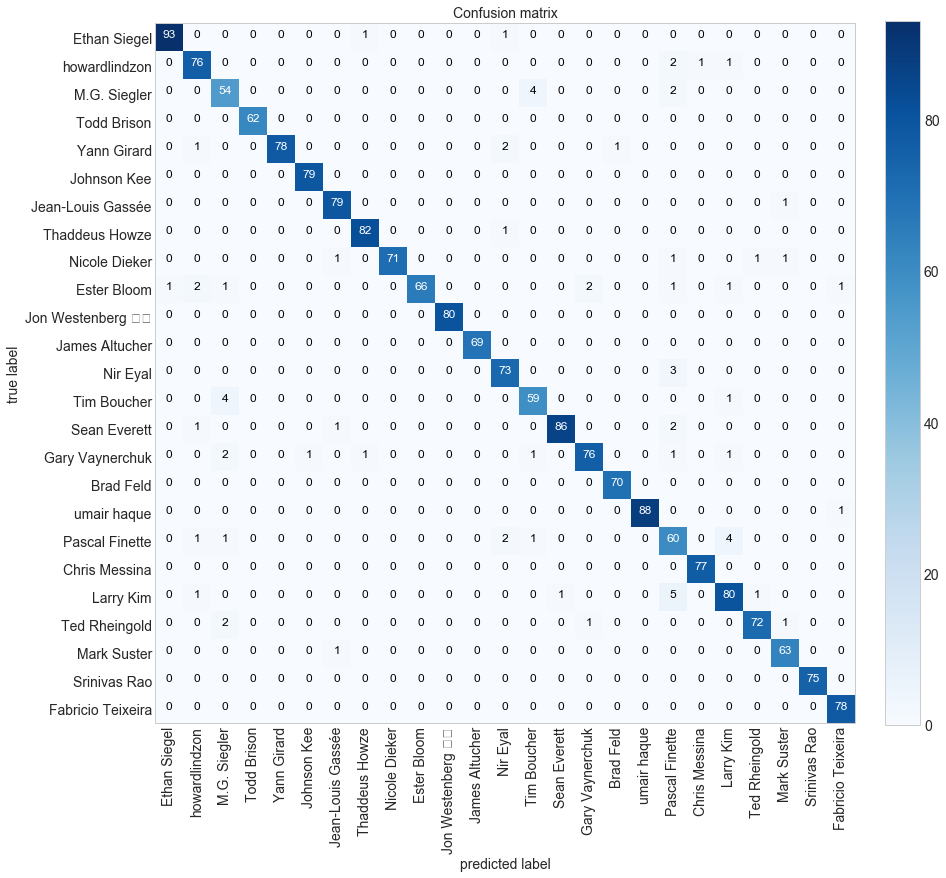

In [48]:
# display confusion matris

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=14)
    cb = plt.colorbar(im, fraction=0.046, pad=0.04)
    cb.ax.tick_params(labelsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, size=14)
    plt.yticks(tick_marks, classes, size=14)
    plt.grid(False)

    fmt = 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 size=12,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('true label', size=14)
    plt.xlabel('predicted label', size=14)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
np.set_printoptions(precision=2)
class_names = list(set(labels['author']))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

#TODO: Check the total in the confusion matrix. I have the feeling it doesn't add up.